In [ ]:
# This is for testing MTF quality by 
# 1. taking a cut through the middle
# 2. integrating portions of the MTF

# created 2019 June 23 by E.S.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import gc
from astropy.io import fits
import pandas as pd
import glob
%matplotlib inline

      max_strip  med_strip  x_pix
0      0.000005   0.000004      0
1      0.000730   0.000727      1
2      0.000284   0.000281      2
3      0.001016   0.001014      3
4      0.000557   0.000554      4
5      0.001276   0.001274      5
6      0.000878   0.000876      6
7      0.001595   0.001593      7
8      0.000382   0.000379      8
9      0.001121   0.001118      9
10     0.000672   0.000669     10
11     0.001385   0.001383     11
12     0.000938   0.000936     12
13     0.001657   0.001655     13
14     0.001237   0.001235     14
15     0.001970   0.001969     15
16     0.000803   0.000801     16
17     0.001519   0.001517     17
18     0.001045   0.001044     18
19     0.001773   0.001772     19
20     0.001315   0.001312     20
21     0.002050   0.002048     21
22     0.001621   0.001618     22
23     0.002359   0.002358     23
24     0.000912   0.000909     24
25     0.001631   0.001628     25
26     0.001185   0.001183     26
27     0.001909   0.001908     27
28     0.00144

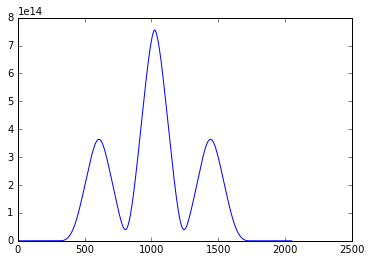

In [11]:
# read in image
sciImg, header = fits.getdata("perfect_mtf.fits",0,header=True)
    
# take strip 5 pixels tall in the middle
y_side_length = np.shape(sciImg)[0]

# examine strips across the MTF center
strip = sciImg[int(0.5*y_side_length)-2:int(0.5*y_side_length)+3,:]
med_strip = np.median(strip, axis = 0)
max_strip = np.max(strip, axis = 0)

# integrate the whole MTF in y (so that we can do a fuller integration later,
# but still have data columns of the right length to write)

y_integ = np.sum(sciImg, axis = 0)

# put data into dictionary
d = {"x_pix": np.arange(np.shape(sciImg)[1]),
     "med_strip": med_strip,
     "max_strip": max_strip, 
     "y_integ": y_integ}

# convert to df
mtf_data = pd.DataFrame(data = d)

# write to file
mtf_data.to_csv("test.csv")

print(mtf_data)

plt.plot(y_integ)
plt.show()

# write out pngs
#plt.plot(sciImg)
#plt.savefig(stem + 'png_thumbnails/' + name_string + '.png', overwrite = True)
#plt.close()

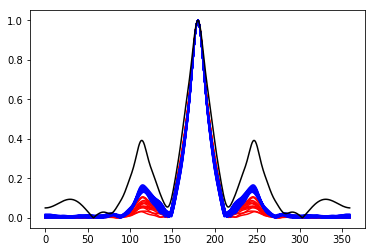

In [17]:
# read in some test files

plt.clf()

# non-phase-controlled PSFs
file_list1 = glob.glob("data/mtf_data_non_phase*csv")
for i in range(0,len(file_list1)):
    mtf_example = pd.read_csv(file_list1[i])

    #plt.plot(mtf_example["x_pix"],mtf_example["max_strip"])
    #plt.plot(mtf_example["x_pix"],mtf_example["med_strip"], color="r")
    plt.plot(mtf_example["x_pix"],np.divide(mtf_example["med_strip"],np.max(mtf_example["med_strip"])), color="r")

# phase-controlled PSFs
file_list2 = glob.glob("data/mtf_data_phase*csv")
for i in range(0,len(file_list2)):
    mtf_example = pd.read_csv(file_list2[i])

    #plt.plot(mtf_example["x_pix"],mtf_example["max_strip"])
    #plt.plot(mtf_example["x_pix"],mtf_example["med_strip"], color="b")
    plt.plot(mtf_example["x_pix"],np.divide(mtf_example["med_strip"],np.max(mtf_example["med_strip"])), color="b")

# the perfect MTF
mtf_br_alpha_perfect = pd.read_csv("data/mtf_data_simulated_br_alpha.csv")
plt.plot(mtf_br_alpha_perfect["x_pix"],np.divide(mtf_br_alpha_perfect["med_strip"],np.max(mtf_br_alpha_perfect["med_strip"])), color="k")
#plt.savefig("test2.pdf")
plt.show()